In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

EDA (Exploratory Data Analysis):-

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# lets see the number of passengers travelling in each class
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
# number of people who Survived and Died in the Titanic incident
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

So, we can see 549 people died and 342 people survived

<Axes: xlabel='Survived', ylabel='count'>

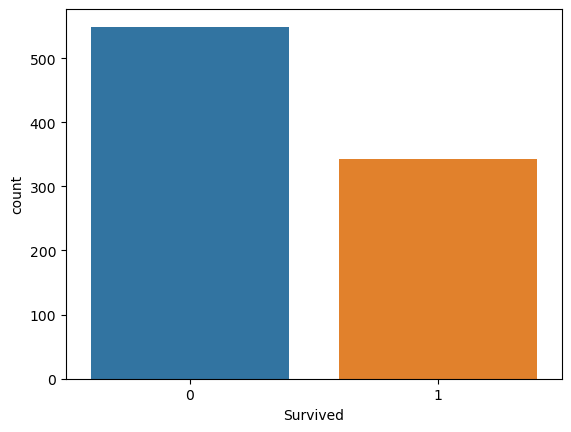

In [9]:
# people who died and survived the incident
sns.countplot(df, x="Survived")
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident

<Axes: xlabel='Survived', ylabel='count'>

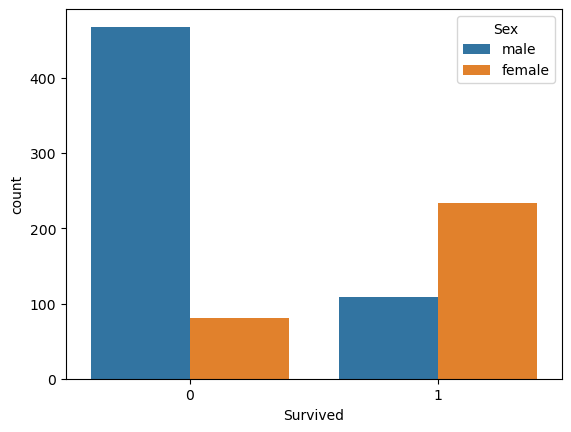

In [10]:
sns.countplot(x ="Survived",hue = "Sex" ,data =df)
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident

<Axes: xlabel='Survived', ylabel='count'>

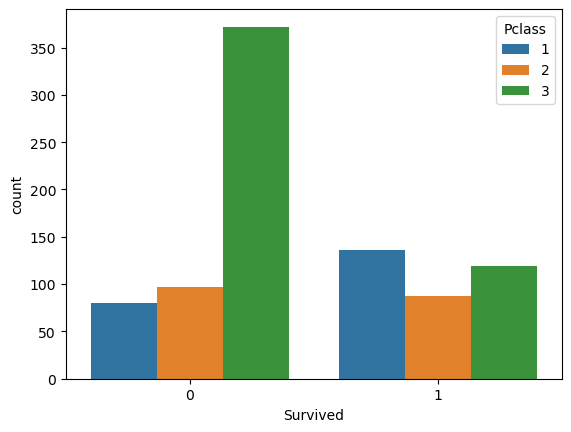

In [11]:
sns.countplot(x ="Survived",hue = "Pclass" ,data =df)
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident

<Axes: xlabel='Pclass', ylabel='Survived'>

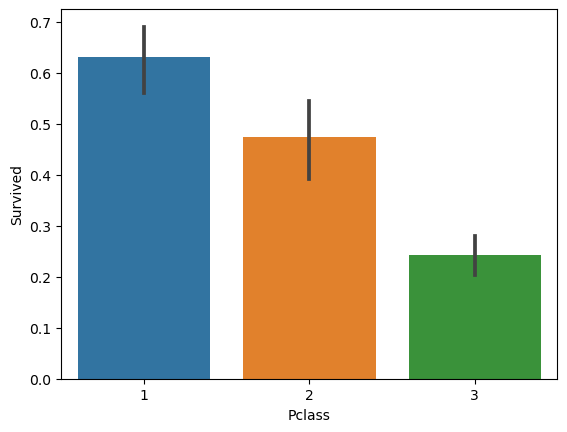

In [12]:
#lets see the passanger class survived
sns.barplot(x='Pclass', y='Survived', data=df)

so first class people survived more

<Axes: xlabel='Pclass', ylabel='count'>

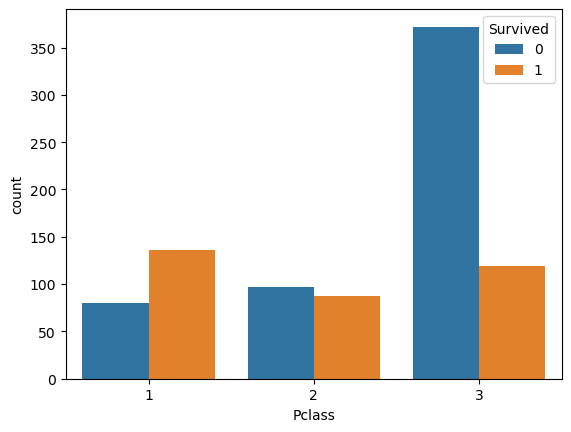

In [13]:
#lets see how many people got survived from each Passanger class
sns.countplot(x='Pclass',hue='Survived',data=df)
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident

So we can see first class people survived more and third class people died more

<Axes: xlabel='Age'>

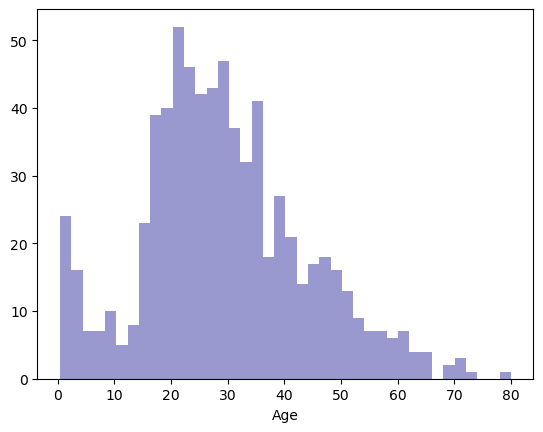

In [14]:
sns.distplot(df['Age'],kde=False,color='darkblue',bins=40)  # data distribution of Age column

From distplot of age we can analyse the distribution of Age of pessangers traveling on Titanic. We can see that Most of the pessangers who were traveling on ship were between age 18 to 35. there were some aged passenger and a very few pessanger(4 or 5) around age 70 and it looks like one pessanger of age 80 was also onboard on the ship the data looks quit normally distributed few outliers are there but that is okay i guess.

<Axes: xlabel='SibSp', ylabel='count'>

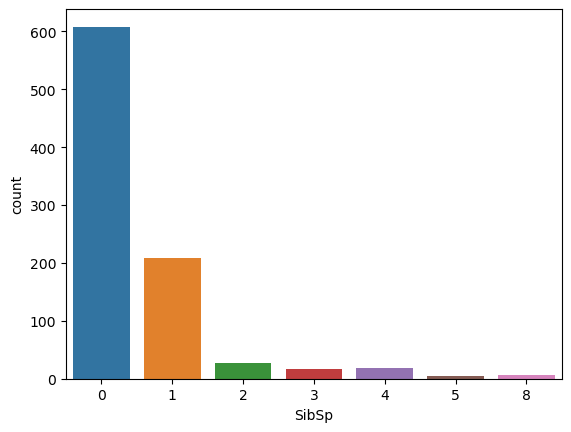

In [15]:
# lets count SibSp which is Sibling or Spouse
sns.countplot(x='SibSp',data=df) 

so, from above plot we can see 600 passangers were traveling alone 
200 passangers had either 1 sibling or spouse.
all the other says total count of siblings along with spouse.

<Axes: xlabel='Parch', ylabel='count'>

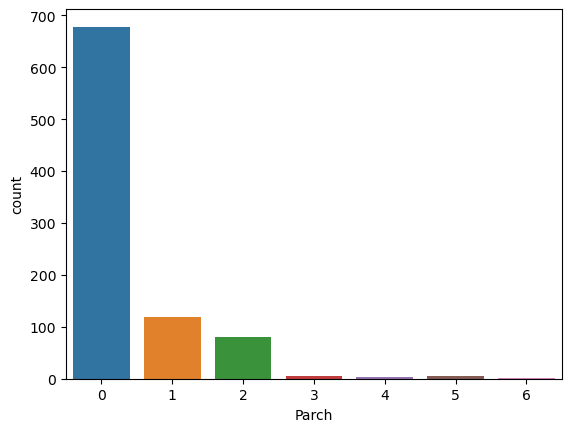

In [16]:
#lets count the Parch which is traveling with there parents and child
sns.countplot(x='Parch',data=df)

here we can see the majority of the people were traveling without family member

<Axes: xlabel='Parch', ylabel='count'>

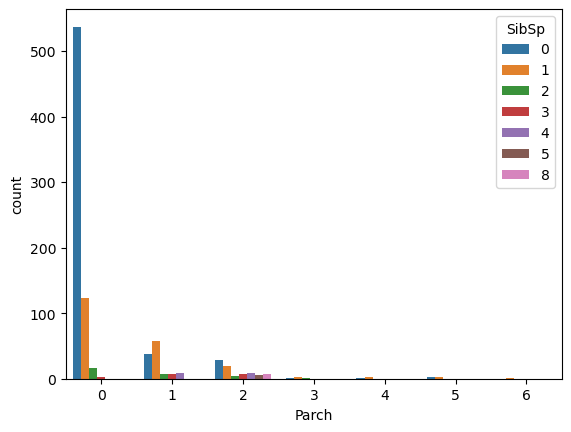

In [17]:
# by combining parch and sibsp(siblings and spouse) we can see who have come alone
sns.countplot(x='Parch',hue='SibSp',data=df)
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident

we can see there were nearly 550 people who came alone

In [18]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

so there were 608 people without siblings or spouse

In [19]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

so there are 678 people without parents and children

In [20]:
# when alone column is 0 which means they have come alone
df["alone"]=df["Parch"]+df["SibSp"]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [21]:
(df['alone']>0).value_counts()

False    537
True     354
Name: alone, dtype: int64

537 people are alone on board

<Axes: xlabel='Embarked', ylabel='count'>

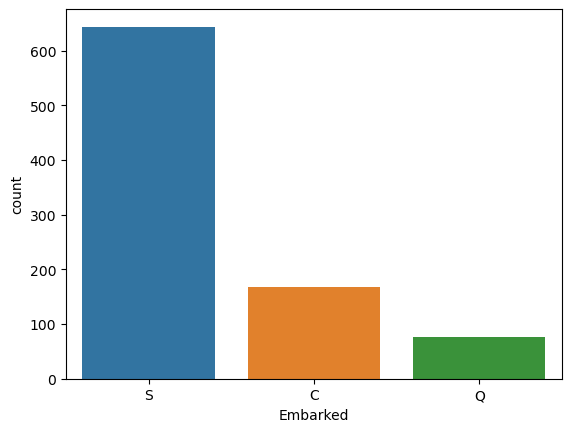

In [22]:
# lets see which port has max number of people boarded
sns.countplot(x='Embarked',data=df)

here we can see more than 600 people has boarded the ship from port S, more than 150 people has boarded from port C and less than 100 from port Q

<Axes: xlabel='Embarked', ylabel='count'>

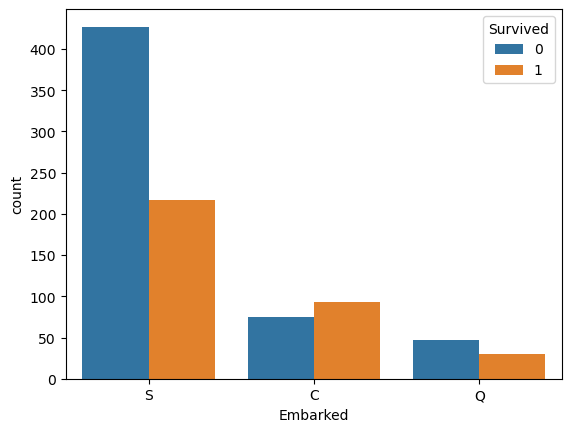

In [23]:
#lets see how many people got survived from each port
sns.countplot(x='Embarked',hue='Survived',data=df)
# 0 indicates the people who died in the incident
# 1 indicates the people who survived in the incident

here we can see that maximum people who died was embarked from S. were 400+ were not survived. 

Text(0, 0.5, 'Count')

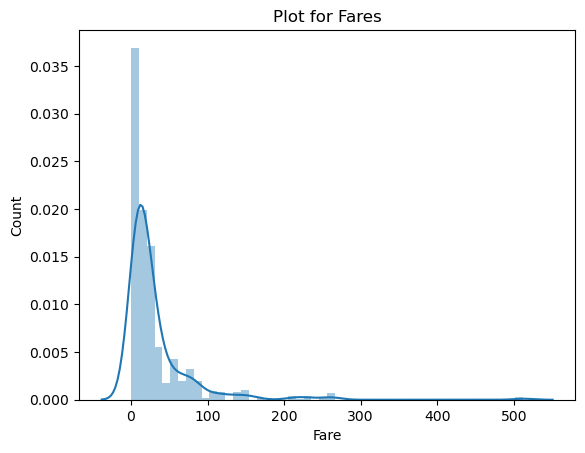

In [24]:
sns.distplot(df['Fare'])
plt.title('Plot for Fares')
plt.xlabel('Fare')
plt.ylabel('Count')

here we can see the majority of the people payed between 0 to 100 pounds. 
0 to 30 is the max value of majority of the people.
there are very few who payed 200, 300, 400, 500

In [25]:
# lets see if there are null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alone            0
dtype: int64

we can see there are 177-Age, 687-Cabin, and 2-Embarked are null

In [26]:
df.shape

(891, 13)

so there are total 891 rows in which 177-Age, 687-Cabin, and 2-Embarked are null

In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


Data Preprocessing

<Axes: xlabel='Pclass', ylabel='Age'>

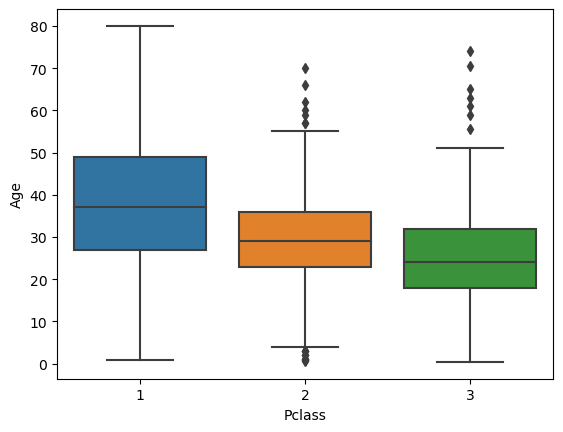

In [28]:
# ploting a boxplot of age and pclass which will give us quantile scores of Pclass and Age
sns.boxplot(x=df['Pclass'],y='Age',data=df)

 So we can see that Average age of 1st class passenger is 37, Average age of 2nd class passenger is 29 and Average age of 3rd class passenger is 24

In [29]:
def fill_age (col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37 # considering 37 as mean value of 1st class passenger
        elif Pclass==2:
            return 29 # considering 29 as mean value of 2nd class passenger
        else:
            return 24 # considering 24 as the 3rd class passenger's average age
    else:
        return Age

In [30]:
fill_age

<function __main__.fill_age(col)>

In [31]:
# filling the null values in age column by .apply method with the function which we defined.
df['Age'] = df[['Age','Pclass']].apply(fill_age,axis=1) 

In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alone            0
dtype: int64

we have treated Age so there is no null value for age

In [33]:
# filling null values on Embarked column lets check its unique values
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [34]:
df['Embarked'].mode()[0]

'S'

In [35]:
# lets fill the Embarked field with mode first value that is 0 => s
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [36]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
alone            0
dtype: int64

lets treat null values in cabin

In [37]:
(687/891)*100

77.10437710437711

So 77% of data is null in Cabin column. So, lets drop that column

In [38]:
del df['Cabin']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


and we have not used PassengerId, Name & Ticket column so far in Data Analysis and Visualaization so lets drop them aswell

In [39]:
df = df.drop(columns = ['PassengerId','Name','Ticket'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


In [40]:
# as we have seen people who are alone or with family/spouse/parents lets drop SibSp and Parch
df = df.drop(columns = ['SibSp', 'Parch'])
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,alone
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


Encoding object or Categorical column which means all the column will be in numeric 

In [41]:
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,Fare,Embarked,alone
0,0,3,1.0,22.0,7.2500,2.0,1
1,1,1,0.0,38.0,71.2833,0.0,1
2,1,3,0.0,26.0,7.9250,2.0,0
3,1,1,0.0,35.0,53.1000,2.0,1
4,0,3,1.0,35.0,8.0500,2.0,0
...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,13.0000,2.0,0
887,1,1,0.0,19.0,30.0000,2.0,0
888,0,3,0.0,24.0,23.4500,2.0,3
889,1,1,1.0,26.0,30.0000,0.0,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    float64
 6   alone     891 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


now everything is in float

In [43]:
# correlation between features and label
df.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,alone
Survived,1.000000,-0.338481,-0.543351,-0.047255,0.257307,-0.167675,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.408487,-0.549500,0.162098,0.065997
Sex,-0.543351,0.131900,1.000000,0.078421,-0.182333,0.108262,-0.200988
Age,-0.047255,-0.408487,0.078421,1.000000,0.123784,-0.011245,-0.251918
Fare,0.257307,-0.549500,-0.182333,0.123784,1.000000,-0.224719,0.217138
Embarked,-0.167675,0.162098,0.108262,-0.011245,-0.224719,1.000000,0.066516
alone,0.016639,0.065997,-0.200988,-0.251918,0.217138,0.066516,1.000000


Correlation is a measure of how well the two variables are related. we can also visualize by heatmap

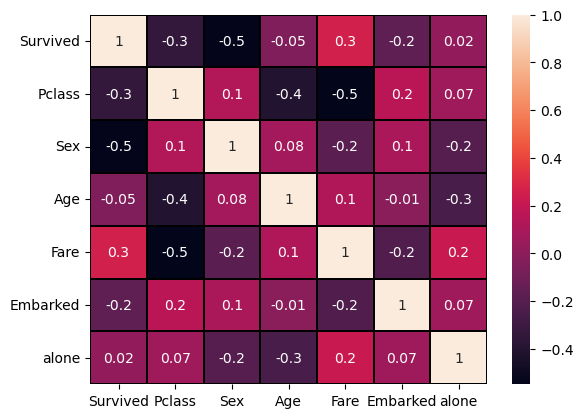

In [44]:
sns.heatmap(df.corr(), linewidths=0.1, fmt=".1g", linecolor='black', annot=True)
plt.show()

this heatmap contains both positive and negative correlation

Model Building

let's divide the data into features (X) and labels (y). 

Now lets seperate dependent and independent columns to X and Y

In [45]:
# we are going to seperate it temp where it has been assign to variable X. 
#We are doing a project on survival so lets keep survival as x axis
X=df.drop('Survived',axis=1) #axis=1 to drop column. axis=0 to drop row
X

,Pclass,Sex,Age,Fare,Embarked,alone
0,3,1.0,22.0,7.2500,2.0,1
1,1,0.0,38.0,71.2833,0.0,1
2,3,0.0,26.0,7.9250,2.0,0
3,1,0.0,35.0,53.1000,2.0,1
4,3,1.0,35.0,8.0500,2.0,0
...,...,...,...,...,...,...
886,2,1.0,27.0,13.0000,2.0,0
887,1,0.0,19.0,30.0000,2.0,0
888,3,0.0,24.0,23.4500,2.0,3
889,1,1.0,26.0,30.0000,0.0,0


In [46]:
Y = df['Survived']
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

lets find the StandardScaler for better result where it is the data preprocessing step for numerical features

In [47]:
scaler = StandardScaler()

In [48]:
x_scaled = scaler.fit_transform(X)
x_scaled

array([[ 0.82737724,  0.73769513, -0.53383369, -0.50244517,  0.58595414,
         0.05915988],
       [-1.56610693, -1.35557354,  0.67489052,  0.78684529, -1.9423032 ,
         0.05915988],
       [ 0.82737724, -1.35557354, -0.23165264, -0.48885426,  0.58595414,
        -0.56097483],
       ...,
       [ 0.82737724, -1.35557354, -0.38274316, -0.17626324,  0.58595414,
         1.29942929],
       [-1.56610693,  0.73769513, -0.23165264, -0.04438104, -1.9423032 ,
        -0.56097483],
       [ 0.82737724,  0.73769513,  0.22161894, -0.49237783, -0.67817453,
        -0.56097483]])

Train & test split - we are going to train the data with ml and evaluate the data with test

The train_test_split() method is used to split our data into training set and testing sets.

In [49]:
# we are considering 20% of the overall data 
X_train, X_test, Y_train, Y_test = train_test_split(x_scaled,Y,test_size=0.25,random_state=150)

In [50]:
# lets see the value - X_train X_test
print(X.shape, X_train.shape, X_test.shape)

(891, 6) (668, 6) (223, 6)


In [51]:
# lets see the value - Y_train Y_test
print(Y.shape, Y_train.shape, Y_test.shape)

(891,) (668,) (223,)


Training our Model

In [52]:
#LogisticRegression:
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
Y_pred1 = model1.predict(X_test)
as_logReg=accuracy_score(Y_test,Y_pred1)
print("Accuracy Score:",as_logReg)

Accuracy Score: 0.8923766816143498


In [53]:
print(classification_report(Y_test,Y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       134
           1       0.90      0.82      0.86        89

    accuracy                           0.89       223
   macro avg       0.89      0.88      0.89       223
weighted avg       0.89      0.89      0.89       223



In [54]:
#KNN
model2 = KNeighborsClassifier()
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_test)
as_knn = accuracy_score(Y_test,Y_pred2)
print("Accuracy Score:", as_knn)

Accuracy Score: 0.8834080717488789


In [55]:
print(classification_report(Y_test,Y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       134
           1       0.92      0.78      0.84        89

    accuracy                           0.88       223
   macro avg       0.89      0.87      0.87       223
weighted avg       0.89      0.88      0.88       223



In [56]:
#SVC
model3 = SVC()
model3.fit(X_train,Y_train)
pred_y3 = model3.predict(X_test)
as_svc = accuracy_score(Y_test,pred_y3)
print("Accuracy Score:",as_svc)

Accuracy Score: 0.8834080717488789


In [57]:
print(classification_report(Y_test,pred_y3))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91       134
           1       0.96      0.74      0.84        89

    accuracy                           0.88       223
   macro avg       0.90      0.86      0.87       223
weighted avg       0.89      0.88      0.88       223



In [58]:
#DecisionTreeClassifier
model4 = DecisionTreeClassifier()
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)
as_dtc = accuracy_score(Y_test,y_pred4)
print("Accuracy Score:",as_dtc)

Accuracy Score: 0.8475336322869955


In [59]:
print(classification_report(Y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       134
           1       0.79      0.84      0.82        89

    accuracy                           0.85       223
   macro avg       0.84      0.85      0.84       223
weighted avg       0.85      0.85      0.85       223



In [60]:
#RandomForestClassifier
model5 = RandomForestClassifier(random_state=10)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)
as_rfc = accuracy_score(Y_test,y_pred5)
print("Accuracy Score:",as_rfc)

Accuracy Score: 0.8654708520179372


In [61]:
print(classification_report(Y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       134
           1       0.86      0.79      0.82        89

    accuracy                           0.87       223
   macro avg       0.87      0.85      0.86       223
weighted avg       0.87      0.87      0.86       223



In [62]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree', 'Random Forest'],
    'Score': [round(as_logReg*100, 2), round(as_knn*100, 2), round(as_svc*100, 2), round(as_dtc*100, 2), round(as_rfc*100, 2)]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
89.24,Logistic Regression
88.34,KNN
88.34,SVC
86.55,Random Forest
84.75,Decision Tree


Here we can clearly see that Support Vector Model gives good result for training the model

Cross valuation helps to Evaluate the scores 

In [63]:
scr1=cross_val_score(model1,x_scaled,Y,cv=5)
scr1

array([0.77653631, 0.81460674, 0.79213483, 0.78651685, 0.82022472])

In [64]:
print("The Cross Validation Score of Logistic Regression Model is: ",scr1.mean())

The Cross Validation Score of Logistic Regression Model is:  0.7980038917833155


In [65]:
scr2=cross_val_score(model2,x_scaled,Y,cv=5)
scr2

array([0.79888268, 0.80898876, 0.80898876, 0.8258427 , 0.81460674])

In [66]:
print("The Cross Validation Score of KNN Model is: ",scr2.mean())

The Cross Validation Score of KNN Model is:  0.8114619295712762


In [67]:
scr3=cross_val_score(model3,x_scaled,Y,cv=5)
scr3

array([0.82681564, 0.8258427 , 0.80898876, 0.80337079, 0.84831461])

In [68]:
print("The Cross Validation Score of SVC Model is: ",scr3.mean())

The Cross Validation Score of SVC Model is:  0.822666499278137


In [69]:
scr4=cross_val_score(model4,x_scaled,Y,cv=5)
scr4

array([0.76536313, 0.76404494, 0.81460674, 0.7752809 , 0.79213483])

In [70]:
print("The Cross Validation Score of Decision Tree Model is: ",scr4.mean())

The Cross Validation Score of Decision Tree Model is:  0.7822861088443915


In [71]:
scr5=cross_val_score(model5,x_scaled,Y,cv=5)
scr5

array([0.77653631, 0.79775281, 0.85393258, 0.7752809 , 0.84269663])

In [72]:
print("The Cross Validation Score of Random Forest Model is: ",scr5.mean())

The Cross Validation Score of Random Forest Model is:  0.8092398468394952


Ploting auc_roc_curve

In [73]:
roc_auc_score(Y_test,pred_y3)

0.8595924870031864

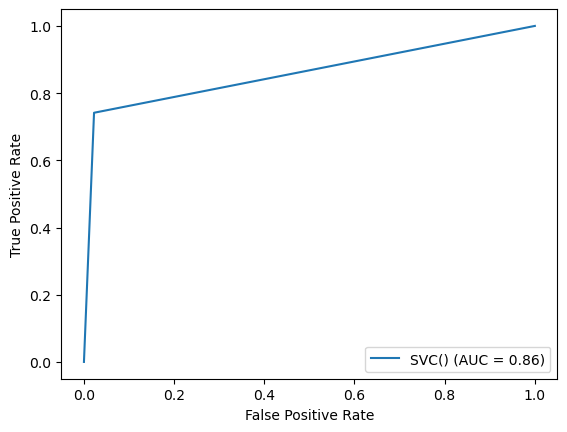

In [74]:
fpr, tpr, thresholds=metrics.roc_curve(Y_test,pred_y3)
auc=metrics.auc(fpr,tpr)
view=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=auc,estimator_name=model3)
view.plot()

In [75]:
import joblib
joblib.dump(model3,"Titanic.obj")

['Titanic.obj']